# K-Means Clustering

### Importing Libraries and Loading Data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Examining Unique Species in Dataset


In [4]:
Iris_data = pd.read_csv("IrisData.csv")
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualizing Sepal Length vs Petal Width with Species Labels


<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

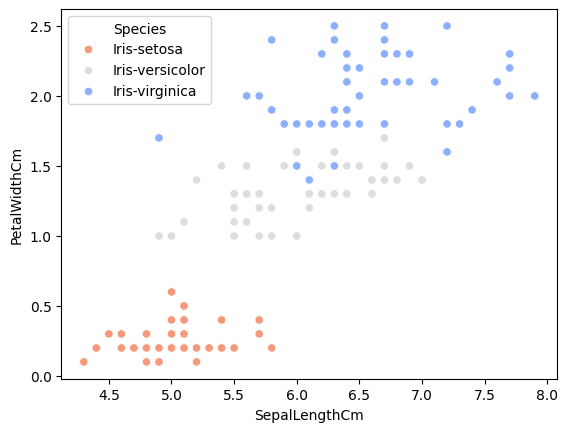

In [6]:
sns.scatterplot(data = Iris_data, x = "SepalLengthCm", y = "PetalWidthCm", hue = Iris_data.Species, palette = "coolwarm_r")

### Applying KMeans Clustering on Selected Features


In [7]:
from sklearn.cluster import KMeans

X = Iris_data[["SepalLengthCm","PetalWidthCm"]]
km = KMeans(n_clusters = 3, n_init = 3, init = "random", random_state = 42)
km.fit(X)
y_kmeans = km.predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2])

### Scatter Plot of KMeans Clusters with Cluster Centers


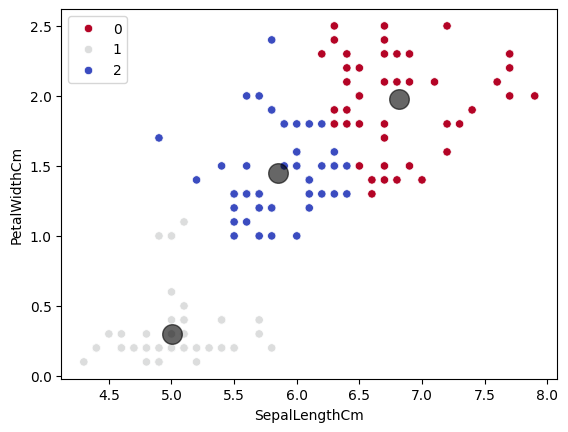

In [8]:
sns.scatterplot(data = Iris_data, x = "SepalLengthCm", y = "PetalWidthCm", hue = y_kmeans, palette = "coolwarm_r")
centers = km.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.6)

### Evaluating KMeans Model Inertia


In [9]:
km.inertia_

32.764035104669894

### Predicting Cluster for New Data Point


In [10]:
newdata = [[4.7,0.8]]
y_pred = km.predict(newdata)
y_pred

c:\Users\use\Desktop\ML\Projects\AI-ML-Algorithms\ai-ml-algorithms\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

### Scatter Plot of Sepal Length and Petal Width

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

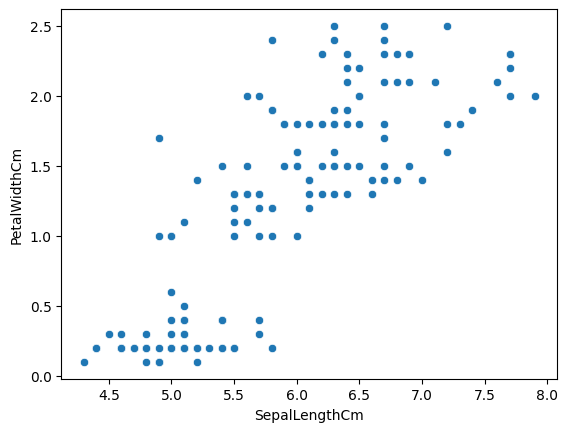

In [11]:
sns.scatterplot(data = Iris_data, x = "SepalLengthCm", y = "PetalWidthCm")


### Finding Optimal Number of Clusters using Elbow Method


c:\Users\use\Desktop\ML\Projects\AI-ML-Algorithms\ai-ml-algorithms\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\use\Desktop\ML\Projects\AI-ML-Algorithms\ai-ml-algorithms\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\use\Desktop\ML\Projects\AI-ML-Algorithms\ai-ml-algorithms\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\use\Desktop\ML\Projects\AI-ML-Algorithms

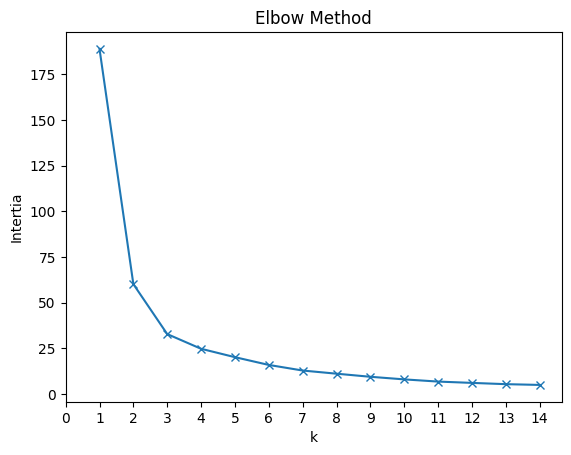

In [12]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    intertia.append(km.inertia_)
    
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

### Conclusion
The KMeans clustering analysis on the Iris dataset successfully partitioned the data into three distinct clusters, which corresponds well with the three known species of iris flowers in the dataset. By focusing on the features Sepal Length and Petal Width, the model was able to group similar samples together based on their natural grouping in feature space.

The Elbow Method helped identify 3 as the optimal number of clusters, which aligns with the biological classification of the data. Visualizations confirmed that the clusters formed are reasonably well-separated with clear cluster centers. The predicted clusters closely match the true species, demonstrating the effectiveness of KMeans as an unsupervised learning technique for discovering inherent patterns without labeled data.

Though KMeans does not use the species labels directly in training, the clustering provides valuable insights and enables grouping based on feature similarity. This analysis exemplifies how unsupervised learning methods like KMeans can uncover hidden structures, supporting downstream tasks such as classification or exploratory data analysis.

In summary, KMeans clustering is a powerful, intuitive method for segmenting multivariate data and the Iris dataset serves as an excellent example illustrating its practical application and interpretability.